In [1]:

import tensorflow as tf
import numpy as np
import tensorflow_datasets as tfds
from IPython.display import clear_output
tfds.disable_progress_bar()

import matplotlib.pyplot as plt

In [2]:
ds_names_clf = 'oxford_flowers102'
dataset_c, info_c = tfds.load(ds_names_clf, split = ['train', 'test'],with_info=True)

In [3]:
info_c

tfds.core.DatasetInfo(
    name='oxford_flowers102',
    full_name='oxford_flowers102/2.1.1',
    description="""
    The Oxford Flowers 102 dataset is a consistent of 102 flower categories commonly occurring
    in the United Kingdom. Each class consists of between 40 and 258 images. The images have
    large scale, pose and light variations. In addition, there are categories that have large
    variations within the category and several very similar categories.
    
    The dataset is divided into a training set, a validation set and a test set.
    The training set and validation set each consist of 10 images per class (totalling 1020 images each).
    The test set consists of the remaining 6149 images (minimum 20 per class).
    
    Note: The dataset by default comes with a test size larger than the train
    size. For more info see this [issue](https://github.com/tensorflow/datasets/issues/3022).
    """,
    homepage='https://www.robots.ox.ac.uk/~vgg/data/flowers/102/',
    data

In [4]:
lables = set()
for example in dataset_c[0]:
    lables.add(int(np.array(example['label'])))
print(min(lables), max(lables))
for example in dataset_c[0].take(5):
    print(example['image'].shape)


0 101
(500, 667, 3)
(500, 666, 3)
(670, 500, 3)
(500, 505, 3)
(500, 672, 3)


У нас разного размера картинки. что не очень хороши нужно их заресайзить в 1 размер. c лейблами все ок у нас 102 класса.

In [5]:
def normalize_c(input_image, label):
  input_image = tf.cast(input_image, tf.float32) / 255.0
  return input_image, label

In [6]:
def load_image_train_c(datapoint):
  input_image = tf.image.resize(datapoint['image'],(200,200))
  label = datapoint['label']

  if tf.random.uniform(()) > 0.5:
    input_image = tf.image.flip_left_right(input_image)


  input_image, label = normalize_c(input_image, label)

  return input_image, label

def load_image_test_c(datapoint):
  input_image = tf.image.resize(datapoint['image'], (200, 200))
  input_mask = label = datapoint['label']

  input_image, label = normalize_c(input_image, label)

  return input_image, label 

In [7]:
train = dataset_c[0].map(load_image_train_c)
test = dataset_c[1].map(load_image_test_c)

In [8]:
test

<MapDataset shapes: ((200, 200, 3), ()), types: (tf.float32, tf.int64)>

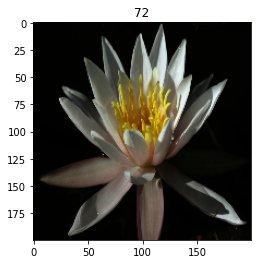

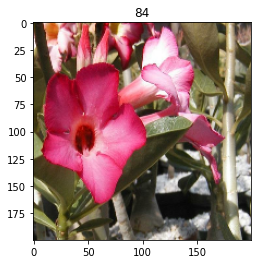

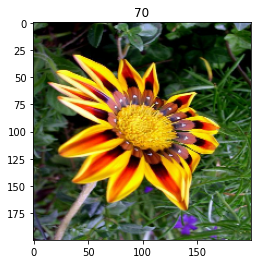

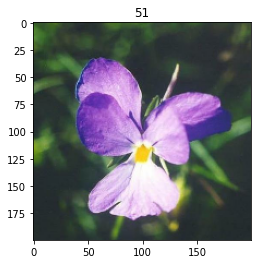

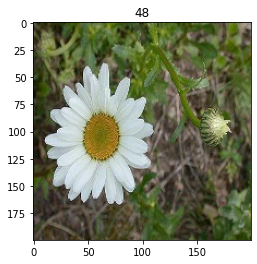

In [9]:
for image, label in train.take(5):
  sample_image, sample_label = image, label
  plt.imshow(sample_image.numpy()[:,:,:])
  plt.title(sample_label.numpy())
  plt.show()

In [10]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [11]:
datagen = ImageDataGenerator(
        featurewise_center=False,
        samplewise_center=False,
        featurewise_std_normalization=False,
        samplewise_std_normalization=False,
        zca_whitening=False, 
        zca_epsilon=1e-06, 
        rotation_range=20, # очень много - это для демнонстрации
        width_shift_range=0.1,  # очень много - это для демнонстрации
        height_shift_range=0.1,
        shear_range=0., 
        zoom_range=0., 
        channel_shift_range=0.,
        fill_mode='nearest',
        cval=0.,
        horizontal_flip=True,
        vertical_flip=False,
        rescale=None,
        preprocessing_function=None,
        data_format=None,
        validation_split=0.0)

In [12]:
BATCH_SIZE = 8
BUFFER_SIZE = 128

In [13]:

train_dataset = train.cache().shuffle(BUFFER_SIZE).batch(BATCH_SIZE).repeat()
train_dataset = train_dataset.prefetch(buffer_size=tf.data.experimental.AUTOTUNE)
train_dataset = train.batch(BATCH_SIZE)

In [14]:
test_dataset = test.cache().shuffle(BUFFER_SIZE).batch(BATCH_SIZE).repeat()
test_dataset = test_dataset.prefetch(buffer_size=tf.data.experimental.AUTOTUNE)
test_dataset = test.batch(BATCH_SIZE)

In [15]:
for image, label in train_dataset.take(3):
  
  sample_image, sample_label = image, label


In [16]:
# for image, label in train_dataset.take(3):
  
#   sample_image, sample_label = image, label
#   for i in range(BATCH_SIZE):
#     plt.imshow(sample_image.numpy()[i,:,:,:])
#     plt.title(sample_label.numpy()[i])
#     plt.show()

In [17]:
datagen = ImageDataGenerator(
        featurewise_center=False,
        samplewise_center=False,
        featurewise_std_normalization=False,
        samplewise_std_normalization=False,
        zca_whitening=False, 
        zca_epsilon=1e-06, 
        rotation_range=20, # очень много - это для демнонстрации
        width_shift_range=0.1,  # очень много - это для демнонстрации
        height_shift_range=0.1,
        shear_range=0., 
        zoom_range=0.1, 
        channel_shift_range=0.,
        fill_mode='nearest',
        cval=0.,
        horizontal_flip=True,
        vertical_flip=False,
        rescale=None,
        preprocessing_function=None,
        data_format=None,
        validation_split=0.0)

In [18]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

In [19]:
import tensorflow.keras.backend as K

In [20]:
from tensorflow.keras.layers import BatchNormalization

In [50]:
l_dim = 102
image_size = (image.shape[1], image.shape[2], image.shape[3])

e_inputs = keras.Input(shape=image_size)
x = layers.Conv2D(150, 5, activation="relu", strides=2, padding="same")(e_inputs)
x = BatchNormalization()(x)
# x = layers.AveragePooling2D(pool_size=(2, 2), strides=2, padding='same')(x)
# x = BatchNormalization()(x)
x = layers.Conv2D(150, 3, activation="relu", strides=2, padding="same")(x)
x = BatchNormalization()(x)
x = layers.AveragePooling2D(pool_size=(2, 2), strides=2, padding='same')(x)
x = BatchNormalization()(x)
# x = layers.Conv2D(64, 3, activation="relu", strides=4, padding="same")(x)
# x = BatchNormalization()(x)
# x = layers.Conv2D(64, 3, activation="relu", strides=4, padding="same")(x)
# x = BatchNormalization()(x)
x = layers.Flatten()(x)

x = layers.Dense(600, activation="relu")(x)
x = BatchNormalization()(x)
x = tf.keras.layers.Dropout(.5)(x)

x = layers.Dense(400, activation="relu")(x)
x = BatchNormalization()(x)
x = tf.keras.layers.Dropout(.5)(x)

x = layers.Dense(l_dim)(x)

model = keras.Model(e_inputs,x, name="classifier")



model.summary()

Model: "classifier"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_5 (InputLayer)         [(None, 200, 200, 3)]     0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 100, 100, 150)     11400     
_________________________________________________________________
batch_normalization_20 (Batc (None, 100, 100, 150)     600       
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 50, 50, 150)       202650    
_________________________________________________________________
batch_normalization_21 (Batc (None, 50, 50, 150)       600       
_________________________________________________________________
average_pooling2d_4 (Average (None, 25, 25, 150)       0         
_________________________________________________________________
batch_normalization_22 (Batc (None, 25, 25, 150)       6

In [22]:
# datagen.flow(x_train, y_train, batch_size=32,
#          subset='training')

In [61]:
g = tfds.as_numpy((train_dataset.take(10)))
for x,y in g:
    datagen.fit(g)

TypeError: float() argument must be a string or a number, not '_IterableDataset'

In [51]:
model.compile(loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits='True'), optimizer=tf.keras.optimizers.Adam(), metrics=['accuracy'])

In [24]:
# model.fit(datagen.flow(train_dataset, batch_size=32,
#          subset='training'),validation_data=datagen.flow(train_dataset,
#          batch_size=8, subset='validation'), epochs=5, batch_size=128)

In [54]:
model.fit(train_dataset, epochs=40, batch_size=128)

Epoch 1/40
128/128 [==============================] - 7s 52ms/step - loss: 1.1955 - accuracy: 0.6343
Epoch 2/40
128/128 [==============================] - 7s 51ms/step - loss: 1.0055 - accuracy: 0.6990
Epoch 3/40
128/128 [==============================] - 7s 51ms/step - loss: 0.8708 - accuracy: 0.7333
Epoch 4/40
128/128 [==============================] - 7s 52ms/step - loss: 0.8381 - accuracy: 0.7559
Epoch 5/40
128/128 [==============================] - 7s 52ms/step - loss: 0.7535 - accuracy: 0.7559
Epoch 6/40
128/128 [==============================] - 7s 52ms/step - loss: 0.6922 - accuracy: 0.7873
Epoch 7/40
128/128 [==============================] - 7s 52ms/step - loss: 0.6501 - accuracy: 0.8010
Epoch 8/40
128/128 [==============================] - 7s 51ms/step - loss: 0.6376 - accuracy: 0.8000
Epoch 9/40
128/128 [==============================] - 6s 50ms/step - loss: 0.5376 - accuracy: 0.8441
Epoch 10/40
128/128 [==============================] - 6s 50ms/step - loss: 0.5439 - accura

In [55]:
model.evaluate(test_dataset)

769/769 [==============================] - 11s 14ms/step - loss: 6.5535 - accuracy: 0.1815


[6.553544044494629, 0.18149292469024658]

In [27]:
train_dataset

<BatchDataset shapes: ((None, 200, 200, 3), (None,)), types: (tf.float32, tf.int64)>

In [28]:
predict = model.predict(train_dataset.take(1))

In [29]:
predicts = []
for i in predict:
    predicts.append(np.argmax(i))
predicts

[34, 84, 70, 51, 93, 83, 42, 58]

In [30]:
for i in train_dataset.take(1):
    print(i[1])

tf.Tensor([72 84 70 51 48 83 42 58], shape=(8,), dtype=int64)


In [31]:
test_list=list(test.take(20))
train_list = list(train.take(20))

In [32]:
for i in range(20):
    a = train_list[i][0][None,:,:,:]
    predict = model.predict(a)
    b = predict.argmax()
    print(b, test_list[i][1])

56 tf.Tensor(40, shape=(), dtype=int64)
84 tf.Tensor(76, shape=(), dtype=int64)
70 tf.Tensor(42, shape=(), dtype=int64)
51 tf.Tensor(63, shape=(), dtype=int64)
90 tf.Tensor(94, shape=(), dtype=int64)
83 tf.Tensor(45, shape=(), dtype=int64)
42 tf.Tensor(94, shape=(), dtype=int64)
58 tf.Tensor(19, shape=(), dtype=int64)
46 tf.Tensor(51, shape=(), dtype=int64)
35 tf.Tensor(46, shape=(), dtype=int64)
40 tf.Tensor(73, shape=(), dtype=int64)
60 tf.Tensor(70, shape=(), dtype=int64)
59 tf.Tensor(72, shape=(), dtype=int64)
37 tf.Tensor(93, shape=(), dtype=int64)
86 tf.Tensor(89, shape=(), dtype=int64)
23 tf.Tensor(10, shape=(), dtype=int64)
91 tf.Tensor(95, shape=(), dtype=int64)
70 tf.Tensor(72, shape=(), dtype=int64)
75 tf.Tensor(49, shape=(), dtype=int64)
71 tf.Tensor(75, shape=(), dtype=int64)


In [33]:
type(test_list[1][0])

tensorflow.python.framework.ops.EagerTensor

In [34]:
a = test_list[1][0][None,:,:,:]

In [35]:
a

<tf.Tensor: shape=(1, 200, 200, 3), dtype=float32, numpy=
array([[[[6.28117621e-01, 5.83127439e-01, 3.24921578e-01],
         [8.13215673e-01, 7.88705885e-01, 5.04392147e-01],
         [7.94960797e-01, 7.98882365e-01, 4.87117618e-01],
         ...,
         [1.67696089e-01, 1.29313722e-01, 1.85294112e-03],
         [2.05529407e-01, 1.37803912e-01, 5.41176461e-03],
         [2.57450998e-01, 1.69137254e-01, 2.15686280e-02]],

        [[5.41313767e-01, 5.01225471e-01, 2.58196056e-01],
         [7.63852954e-01, 7.39343166e-01, 4.69735295e-01],
         [7.88450956e-01, 7.78647006e-01, 4.80382353e-01],
         ...,
         [6.67941123e-02, 6.38431311e-02, 2.15686538e-04],
         [1.19637251e-01, 1.06107838e-01, 0.00000000e+00],
         [1.85323521e-01, 1.64382353e-01, 2.32058819e-02]],

        [[4.45441186e-01, 4.21470582e-01, 1.93284303e-01],
         [6.94362760e-01, 6.71960771e-01, 4.19558793e-01],
         [7.97549009e-01, 7.79362738e-01, 4.95882332e-01],
         ...,
         [2

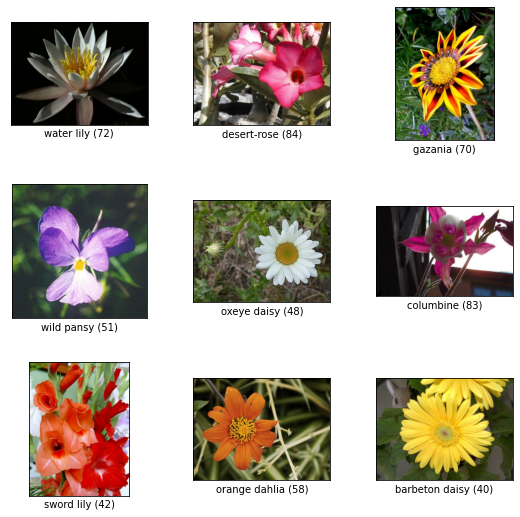

In [36]:
fig = tfds.show_examples(dataset_c[0].take(10), info_c)

In [37]:
predict = model.predict(a)

In [38]:
i = predict.argmax()

In [39]:
i

37